In [129]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999


### Importing Scraped Tweets

In [92]:
harvey_df = pd.read_csv('./Data/harvey.csv')
michael_df = pd.read_csv('./Data/michael.csv')
florence_df = pd.read_csv('./Data/florence.csv')
florence_df = florence_df[florence_df.username != 'SouthDakotaDOT']

In [93]:
florence_df['text'][:900]

0      Driving in areas at risk of flooding is extrem...
1      Bertie Correctional Institution Assistant Main...
2      Find out more about FEMA Disaster Assistance a...
3      https://twitter.com/NWSMoreheadCity/status/104...
4      If you evacuated during #HurricaneFlorence, it...
5      Some rivers are still rising & are not expecte...
6      Great to see different teams from across the s...
7      Currently there are about 3,430 National Guard...
8      NC prisons responded to #FlorenceNC swiftly & ...
9      Hear firsthand from 1st Sgt. Mike Baker on the...
10     @NC_Governor, @NCPublicSafety Secretary Hooks,...
11     . @NCSHP has a helpful reminder on what to do ...
12     Yesterday @NCPublicSafety Sec. Erik Hooks visi...
13     . @NCPublicSafety's Correction Enterprises Sig...
14     Great work by #NCNG and out of state partners....
15     Reminder that Road St. (State Road 1209) in Ty...
16     Thanks to our partners for coming to our aid! ...
17     If you are in a safe pla

In [94]:
florence_df['text'][932]

'http://bit.ly/2O2ApY8 , US-1, North, Near Raleigh, Vehicle Crash, Lane Closed, at 9/21 7:20 AM'

## Removing Hyperlinks, Image Links, Certian Special Characters, and adding Date/time Columns

In [95]:
def clean_tweets (df):
    df['text'] = df['text'].str.replace(r'pic.twitter.com.*[\r\n]*', '', regex=True)
    df['text'] = df['text'].map(lambda x: re.sub('http[s]?:\/\/[^\s]*',' ', x))
    df['text'] = df['text'].str.lower()
    # Converting column to datetime, adding time column, making data column
    df['date'] = pd.to_datetime(df['date'])
    df['time'] = df['date'].dt.time
    df['date'] = df['date'].dt.date
    #removing uneeded columns
    df.drop(columns=['hashtags','type','geo'], inplace=True)
    # removing certain special characters
    df['text'] = df['text'].str.replace('.', '')
    df['text'] = df['text'].str.replace('/', '')
    df['text'] = df['text'].str.replace(',', '')
    df['text'] = df['text'].str.replace("'", '')
    df['text'] = df['text'].str.replace(";", '')
    df['text'] = df['text'].str.replace("(", '')
    df['text'] = df['text'].str.replace(")", '')
    return

    

clean_tweets(harvey_df)
clean_tweets(florence_df)
clean_tweets(michael_df)



In [96]:
harvey_df['text'][892]

'fm-1764 eastbound at ih-45 - high water - status: verified at 1:19 am - lanes affected: all mainlanes'

## Adding States
---
Adding the state names will be essential when mapping out the locations of road closures or blockages. For Hurricane Michael and Harvey, we only observed one state, Florida and Texas, respectively. Hurrican Florence 

In [97]:
michael_df['state'] = michael_df['username'].map(lambda x: 'Georgia' if x in ['AlbanyGaPD','511Georgia','CityofAlbanyGA'] else 'Florida')
michael_df = michael_df[michael_df.state != 'Georgia']
harvey_df['state'] = 'Texas'
florence_df['state'] = florence_df['username'].apply(lambda x: 'South Carolina' if x in ['SCDOTPeeDee' , 'SCDOTPiedmont','SCDOTMidlands','SCDOTLowCountry','SouthDakotaDOT'] else 'North Carolina')


## Split cell

In [98]:
harvey_df['split_text'] = harvey_df['text'].str.split()
michael_df['split_text'] = michael_df['text'].str.split()
florence_df['split_text'] = florence_df['text'].str.split()


In [99]:
florence_df.head()

,id,username,date,text,time,state,split_text
0,1043262364844544002,NCPublicSafety,2018-09-21,driving in areas at risk of flooding is extrem...,22:15:05,North Carolina,"[driving, in, areas, at, risk, of, flooding, i..."
1,1043226122715062272,NCPublicSafety,2018-09-21,bertie correctional institution assistant main...,19:51:04,North Carolina,"[bertie, correctional, institution, assistant,..."
2,1043201830711373825,NCPublicSafety,2018-09-21,find out more about fema disaster assistance a...,18:14:32,North Carolina,"[find, out, more, about, fema, disaster, assis..."
3,1043138004339105792,NCPublicSafety,2018-09-21,…,14:00:55,North Carolina,[…]
4,1043126471286501376,NCPublicSafety,2018-09-21,if you evacuated during #hurricaneflorence it ...,13:15:05,North Carolina,"[if, you, evacuated, during, #hurricaneflorenc..."


In [100]:
florence_df.to_csv('florence_clean.csv', index=False)
michael_df.to_csv('michael_clean.csv', index=False)
harvey_df.to_csv('harvey_clean.csv', index=False)

## Making a list of incident

In [101]:
['Crash','Crashed','Accident','Collision','collided','Fatal','Tow',
'Break','Damage','damaged','Repair''Road work','Closure','closed',
'Zone','Maintenance','Schedule','Seal','Flooded','flood','broken','broke',
 
 'Obstacles','Obstacle','Disabled',
'Stuck','Rain','Slip','Wind','Flood','Rainy','Hazard','Tree','Block','Wiper',
 'Inches','Wet',
'Cold','Freeze','Hot','Visibility','Fire','Weather','Animal','Deer','Dead',
 'Hail','Melt','Slope',
'Slick','Tire','Cover','Friction','Frozen', 'storm', 'traffic']

['Crash',
 'Crashed',
 'Accident',
 'Collision',
 'collided',
 'Fatal',
 'Tow',
 'Break',
 'Damage',
 'damaged',
 'RepairRoad work',
 'Closure',
 'closed',
 'Zone',
 'Maintenance',
 'Schedule',
 'Seal',
 'Flooded',
 'flood',
 'broken',
 'broke',
 'Obstacles',
 'Obstacle',
 'Disabled',
 'Stuck',
 'Rain',
 'Slip',
 'Wind',
 'Flood',
 'Rainy',
 'Hazard',
 'Tree',
 'Block',
 'Wiper',
 'Inches',
 'Wet',
 'Cold',
 'Freeze',
 'Hot',
 'Visibility',
 'Fire',
 'Weather',
 'Animal',
 'Deer',
 'Dead',
 'Hail',
 'Melt',
 'Slope',
 'Slick',
 'Tire',
 'Cover',
 'Friction',
 'Frozen',
 'storm',
 'traffic']

In [102]:
closed = ['closure', 'closed', 'road work', 'Maintenance', 'clsd','avoid',
          'stay off','block','blocked','shut down','inaccessible','closing', 
          'no vehicles', 'sealed', 'restricted', 'crash']


In [103]:
reopen = ['finish','finished', 'open','opened','ended', 'fixed',
          'reopened', 'repaired', 'cleared', 'concluded','restored']

In [104]:
cause = ['flood', 'flooded','crash','crashed', 'accident', 'collision',
         'collided', 'damage','damaged', 'repair', 'obstacle', 'obstacles', 'disabled',
         'wet', 'visibility', 'hazard', 'tree', 'weather', 'slick',
         'storm', 'maintenance','congestion','congested','weather','event']

## Adding Status

In [106]:
def closed_open_cause(df):
    df['closed'] = df.text.str.extract('(?i)({0})'.format('|'.join(closed)))
    df['open'] = df.text.str.extract('(?i)({0})'.format('|'.join(reopen)))
    df['cause'] = df.text.str.extract('(?i)({0})'.format('|'.join(cause)))
    return

closed_open_cause(harvey_df)
closed_open_cause(michael_df)
closed_open_cause(florence_df)

In [82]:
harvey_df = harvey_df.dropna(axis=0, subset=['closed'])
harvey_df= harvey_df[pd.isnull(harvey_df['open'])]

michael_df = michael_df.dropna(axis=0, subset=['closed'])
michael_df= michael_df[pd.isnull(michael_df['open'])]

florence_df = florence_df.dropna(axis=0, subset=['closed'])
florence_df= florence_df[pd.isnull(florence_df['open'])]

In [83]:
florence_df.to_csv('florence_clean.csv', index=False)
michael_df.to_csv('michael_clean.csv', index=False)
harvey_df.to_csv('harvey_clean.csv', index=False)

In [112]:
harvey_df['open'][:230]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6         open
7          NaN
8          NaN
9         open
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35        open
36         NaN
37         NaN
38         NaN
39         NaN
40        open
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49         NaN
50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58         NaN
59       ended
60         NaN
61         NaN
62         NaN
63         NaN
64         NaN
65         NaN
66        

In [119]:
harvey_df['text'][232]

'beltway 8-east northbound at wallisville - accident - status: cleared at 2:41 am'

Text(0, 0.5, 'payout value sum')

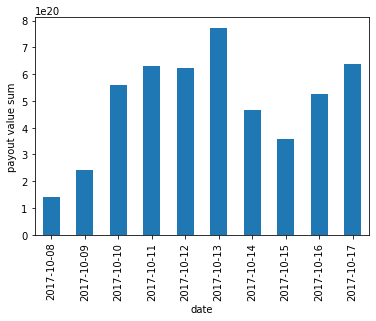

In [134]:
michael_df.groupby('date').agg(['sum']).plot.bar(legend='')
plt.xlabel('date')
plt.ylabel('payout value sum')

In [135]:
michael_df.shape

(5397, 10)